# Telecom Churn

Telecom churn, often referred to as customer churn or subscriber churn, is a significant concern in the telecommunications industry. Churn refers to the phenomenon where customers or subscribers switch from one telecom service provider to another or discontinue their subscription to telecom services altogether. This can result from various factors, including dissatisfaction with the service, better offers from competitors, or changes in the customer's needs.

# Importing libraries

In [1]:
# Import necessary libraries
import pandas as pd  # Import the pandas library for data manipulation
import numpy as np   # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns            # Import seaborn for enhanced data visualization
from ipywidgets import widgets, interactive, interact  # Import ipywidgets for creating interactive widgets

In [2]:
# Set the display precision for Pandas DataFrames to 2 decimal places
pd.set_option("display.precision", 2)

# Import the 'warnings' module and configure it to ignore warnings
import warnings

# The 'warnings.filterwarnings' function is used to filter and handle warnings.
# In this case, it's configured to ignore all warnings ('ignore').
warnings.filterwarnings('ignore')

# Importing data and exloring type info and missing values

In [3]:
# Read the data from a CSV file named "telecom_churn.csv" into a Pandas DataFrame
data = pd.read_csv("telecom_churn.csv")

# Display the first few rows of the DataFrame to get an initial look at the data
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Generate summary statistics for the numerical columns in the DataFrame
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [5]:
# Calculate the count of missing values (NaN) for each column in the DataFrame
np.sum(data.isna())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
# Get the dimensions (number of rows and columns) of the DataFrame
data.shape

(3333, 20)

In [7]:
# Get the column names of the DataFrame
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
# Display information about the DataFrame, including column data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Transforming Data

In [9]:
# Convert the "Churn" column to the 'int64' data type (assuming it contains integer values)
data["Churn"] = data["Churn"].astype("int64")

# Display updated information about the DataFrame, including column data types and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
# Select columns with data type 'object' (typically string or categorical) and convert to a list
data.select_dtypes(include=['object']).columns.tolist()

['State', 'International plan', 'Voice mail plan']

In [11]:
# Select columns with data type 'object' (typically string or categorical) and create a new DataFrame
data[data.select_dtypes(include=['object']).columns.tolist()]

,State,International plan,Voice mail plan
0,KS,No,Yes
1,OH,No,Yes
2,NJ,No,No
3,OH,Yes,No
4,OK,Yes,No
...,...,...,...
3328,AZ,No,Yes
3329,WV,No,No
3330,RI,No,No
3331,CT,Yes,No


In [12]:
# Define a mapping dictionary to replace values
mapping = {"Yes": True, "No": False}

# Use the 'apply' method with a lambda function to map values in specific columns
data[['International plan', 'Voice mail plan']] = data[['International plan', 'Voice mail plan']].apply(lambda x: x.map(mapping))

# Display the first few rows of the DataFrame to see the result
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [13]:
# Get the data types of each column in the DataFrame
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan           bool
Voice mail plan              bool
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                       int64
dtype: object

In [14]:
# Calculate the count of missing values (NaN or null values) for each column in the DataFrame
np.sum(data.isna())

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [15]:
# Generate summary statistics for the numerical columns in the DataFrame
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In [16]:
# Generate summary statistics for columns with data types "object" and "bool" in the DataFrame
data.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,False,False
freq,106,3010,2411


In [17]:
# Convert boolean values in the specified columns to integers
data[['International plan', 'Voice mail plan']] = data[['International plan', 'Voice mail plan']].astype('int64')

# Display the first few rows of the updated DataFrame
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Exploring data

In [18]:
# Count the occurrences of unique values in the "State" column
data["State"].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [19]:
# Count the occurrences of unique values in the "Churn" column
data["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [20]:
# Count the occurrences of unique values in the "Churn" column and calculate proportions
data["Churn"].value_counts(normalize=True)

0    0.86
1    0.14
Name: Churn, dtype: float64

14% of customers have churned

In [21]:
# Count the occurrences of unique values in the "International plan" column
data["International plan"].value_counts()

0    3010
1     323
Name: International plan, dtype: int64

In [22]:
# Count the occurrences of unique values in the "International plan" column and calculate proportions
data["International plan"].value_counts(normalize=True)

0    0.9
1    0.1
Name: International plan, dtype: float64

10% of costumers have international plan

In [23]:
# Count the occurrences of unique values in the "Voice mail plan" column
data["Voice mail plan"].value_counts()

0    2411
1     922
Name: Voice mail plan, dtype: int64

In [24]:
# Count the occurrences of unique values in the "Voice mail plan" column and calculate proportions
data["Voice mail plan"].value_counts(normalize=True)

0    0.72
1    0.28
Name: Voice mail plan, dtype: float64

28% of customers have Voice Mail Plan

### Who has more Charges?

In [25]:
# Sort the DataFrame by the "Total day charge" column in descending order
# and display the top rows with the highest day charges
data.sort_values("Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,0,0,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,1,0,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,1,0,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,0,0,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,0,0,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


In [26]:
# Sort the DataFrame by the "Total eve charge" column in descending order
# and display the top rows with the highest evening charges
data.sort_values("Total eve charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2732,NC,130,408,1,0,0,216.2,106,36.75,363.7,86,30.91,126.7,123,5.70,16.9,2,4.56,5,1
2331,IN,46,415,0,1,34,191.4,102,32.54,361.8,96,30.75,147.5,132,6.64,7.2,2,1.94,1,0
2551,MD,102,415,0,0,0,129.5,56,22.02,354.2,118,30.11,145.5,93,6.55,10.9,3,2.94,1,0
8,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1601,AR,99,510,1,0,0,242.3,102,41.19,350.9,102,29.83,163.1,93,7.34,11.3,3,3.05,0,1


In [27]:
# Sort the DataFrame by the "Total night charge" column in descending order
# and display the top rows with the highest night charges
data.sort_values("Total night charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2663,VA,172,510,0,0,0,169.8,123,28.87,183.1,94,15.56,395.0,72,17.77,12.7,7,3.43,2,0
1317,NE,89,415,0,1,29,163.5,80,27.80,274.8,136,23.36,381.9,147,17.19,7.5,5,2.03,2,0
1445,ID,55,510,0,1,8,222.5,104,37.83,171.5,94,14.58,377.5,114,16.99,9.7,2,2.62,1,0
2321,AR,153,408,0,0,0,154.6,56,26.28,263.0,84,22.36,367.7,89,16.55,15.5,2,4.19,1,0
3107,GA,73,408,0,0,0,157.6,92,26.79,198.3,87,16.86,364.9,106,16.42,9.1,4,2.46,1,0


In [28]:
# Sort the DataFrame by the "Total intl charge" column in descending order
# and display the top rows with the highest international charges
data.sort_values("Total intl charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
115,ME,36,510,1,1,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,1
314,ID,128,408,0,0,0,125.2,99,21.28,205.4,107,17.46,254.4,111,11.45,18.9,2,5.10,0,0
1816,OR,53,415,0,0,0,184.8,98,31.42,216.4,125,18.39,141.1,116,6.35,18.4,3,4.97,2,0
2816,ID,130,415,0,0,0,263.7,113,44.83,186.5,103,15.85,195.3,99,8.79,18.3,6,4.94,1,1
2371,IL,100,415,0,0,0,191.9,95,32.62,200.9,101,17.08,271.9,74,12.24,18.2,3,4.91,1,0


In [29]:
# Sort the DataFrame by the "Churn" column in descending order and then by "Total intl charge" column
# within each "Churn" group in descending order, and display the top rows
data.sort_values(["Churn", "Total intl charge"], ascending=[False, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
115,ME,36,510,1,1,42,196.8,89,33.46,254.9,122,21.67,138.3,126,6.22,20.0,6,5.40,0,1
2816,ID,130,415,0,0,0,263.7,113,44.83,186.5,103,15.85,195.3,99,8.79,18.3,6,4.94,1,1
1420,MI,81,415,1,0,0,149.4,68,25.40,171.9,98,14.61,214.5,97,9.65,17.9,3,4.83,3,1
214,FL,70,510,1,0,0,226.7,98,38.54,228.1,115,19.39,73.2,93,3.29,17.6,4,4.75,2,1
502,MI,93,415,1,0,0,216.9,61,36.87,207.4,120,17.63,221.7,110,9.98,17.5,5,4.73,1,1


In [30]:
# Calculate the mean (average) of the "Churn" column
data.Churn.mean()

0.14491449144914492

14% of people have churned

In [31]:
# Select rows where "Churn" is equal to 1 (churned customers) and calculate the mean for each numeric column
data[data["Churn"] == 1].mean()

Account length            102.66
Area code                 437.82
International plan          0.28
Voice mail plan             0.17
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

In [32]:
# Filter the data to select rows where "Churn" is 0 (not churned) and "International plan" is 0 (no international plan)
# This creates a subset of customers who have not churned and do not have an international plan.
# Then, we proceed to calculate specific statistics for this subset.
data[(data["Churn"]==0) & (data["International plan"]==0)][["Total intl charge","Total intl calls"]].max()

Total intl charge     5.1
Total intl calls     19.0
dtype: float64

states starting with V

In [33]:
# Filter the data to select rows where the "State" column starts with the letter "V"
# This applies a lambda function to check the first character of each state name.
data[data["State"].apply(lambda x: x[0] == "V")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
17,VT,93,510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
18,VA,76,510,0,1,33,189.7,66,32.25,212.8,65,18.09,165.7,108,7.46,10.0,5,2.70,1,0
24,VA,132,510,0,0,0,81.1,86,13.79,245.2,72,20.84,237.0,115,10.67,10.3,2,2.78,0,0
52,VA,10,408,0,0,0,186.1,112,31.64,190.2,66,16.17,282.8,57,12.73,11.4,6,3.08,2,0
85,VT,128,510,0,1,29,179.3,104,30.48,225.9,86,19.20,323.0,78,14.54,8.6,7,2.32,0,0


groupby State

In [47]:
# Define a list of columns to perform aggregation on
columns = ["Total day charge", "Total eve charge", "Total night charge","Total intl charge"]

# Group the data by the "State" column and apply aggregation functions to the specified columns
# The aggregation functions include sum, mean, minimum, maximum, and standard deviation.
data.groupby("State")[columns].agg([np.sum, np.mean, np.min, np.max, np.std])

Total day charge                             Total eve charge         \
                   sum   mean   amin   amax    std              sum   mean   
State                                                                        
AK             1576.94  30.33   9.89  47.33   8.44           814.54  15.66   
AL             2529.72  31.62  11.68  52.36   8.75          1329.16  16.61   
AR             1646.70  29.94   9.40  46.48   8.56           939.93  17.09   
AZ             1867.08  29.17  10.01  47.79   8.83          1021.37  15.96   
CA             1061.01  31.21  15.78  47.60   8.12           575.06  16.91   
CO             2005.20  30.38   5.25  59.64  10.17          1160.60  17.58   
CT             2203.30  29.77   6.43  54.67  10.29          1282.12  17.33   
DC             1573.31  29.14   8.76  52.05   9.72           900.94  16.68   
DE             1810.49  29.68   7.91  56.83   8.85          1079.78  17.70   
FL             1922.85  30.52   8.11  48.98   9.77          1126.04  17.87   
GA             1698.58  31.46  12.10  50.92   9.14           937.02  17.35   
HI             1585.39  29.91   7.12  49.57   9.32           861.98  16.26   
IA             1328.60  30.20  14.98  52.46   8.23           771.95  17.54   
ID             2216.70  30.37   9.45  46.65   8.98          1207.57  16.54   
IL             1711.67  29.51  11.75  45.83   8.47           970.21  16.73   
IN             2372.11  33.41   8.48  51.07   8.83          1222.44  17.22   
KS             2279.56  32.57   4.59  54.62   9.88          1204.95  17.21   
KY             1742.81  29.54  12.55  53.48   9.34           984.17  16.68   
LA             1546.56  30.32   9.93  52.77   7.72           857.58  16.82   
MA             1990.14  30.62  10.01  49.93   8.72          1186.06  18.25   
MD             2347.07  33.53  13.28  54.59   9.87          1166.58  16.67   
ME             1952.74  31.50  10.00  54.79   8.96          1056.73  17.04   
MI             2241.17  30.70   3.21  53.40   9.33          1291.71  17.69   
MN             2618.36  31.17   8.60  54.03   9.63          1423.27  16.94   
MO             1826.20  28.99   7.65  57.04   9.87          1071.77  17.01   
MS             1966.15  30.25  12.02  53.24  10.48          1105.08  17.00   
MT             2011.55  29.58  15.27  46.44   8.30          1164.85  17.13   
NC             2140.32  31.48   9.30  54.79   9.56          1170.71  17.22   
ND             1974.61  31.85  14.03  50.20   7.69          1094.99  17.66   
NE             1840.33  30.17   5.78  46.36   8.94          1053.10  17.26   
NH             1688.19  30.15   2.99  54.81  10.19           943.24  16.84   
NJ             2268.39  33.36   6.95  51.26   8.26          1146.13  16.85   
NM             1806.86  29.14  11.75  48.74   7.64          1118.27  18.04   
NV             1979.53  29.99  11.46  51.66   9.62          1138.36  17.25   
NY             2470.94  29.77  10.30  58.96   9.65          1389.79  16.74   
OH             2430.29  31.16   1.33  58.70   9.48          1368.73  17.55   
OK             1865.67  30.58   0.44  56.07  10.49          1000.86  16.41   
OR             2337.10  29.96   2.13  55.20   9.52          1335.95  17.13   
PA             1441.10  32.02   5.97  49.08   9.37           733.06  16.29   
RI             1850.69  28.47   6.87  48.65   9.42          1166.00  17.94   
SC             1697.75  28.30   3.32  54.83  10.81          1058.00  17.63   
SD             1934.86  32.25   0.00  55.78   9.41          1033.87  17.23   
TN             1583.73  29.88   9.32  51.88   8.60           948.37  17.89   
TX             2221.81  30.86  10.12  55.51   9.72          1222.71  16.98   
UT             2246.92  31.21  10.74  48.57   9.15          1195.53  16.60   
VA             2320.14  30.13   7.63  48.18   8.38          1336.66  17.36   
VT             2259.08  30.95   0.00  52.21   8.85          1274.36  17.46   
WA             2005.52  30.39   6.41  49.15   9.59          1143.40  17.32   
WI             2375.28  30.4

In [35]:
# Define a list of columns for which you want to generate descriptive statistics
columns = ["Total day minutes", "Total eve minutes", "Total night minutes"]

# Group the data by the "Churn" column and generate descriptive statistics for the specified columns
# The 'describe' function is used with the 'percentiles' parameter set to an empty list, which means no additional percentiles are calculated.
data.groupby("Churn")[columns].describe(percentiles=[])

Total day minutes                                   Total eve minutes  \
                  count    mean    std  min    50%    max             count   
Churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         Total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
Churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
Churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

In [36]:
# Create a cross-tabulation (contingency table) between the "Churn" and "International plan" columns
# The 'normalize=True' parameter is used to calculate proportions instead of counts.
# The 'margins=True' parameter adds row and column totals to the table.
pd.crosstab(data["Churn"], data["International plan"], normalize=True, margins=True)

International plan,0,1,All
Churn,,,
0,0.8,0.06,0.86
1,0.1,0.04,0.14
All,0.9,0.10,1.00


4% of people have churned and have an international plan

### Correlation Matrix

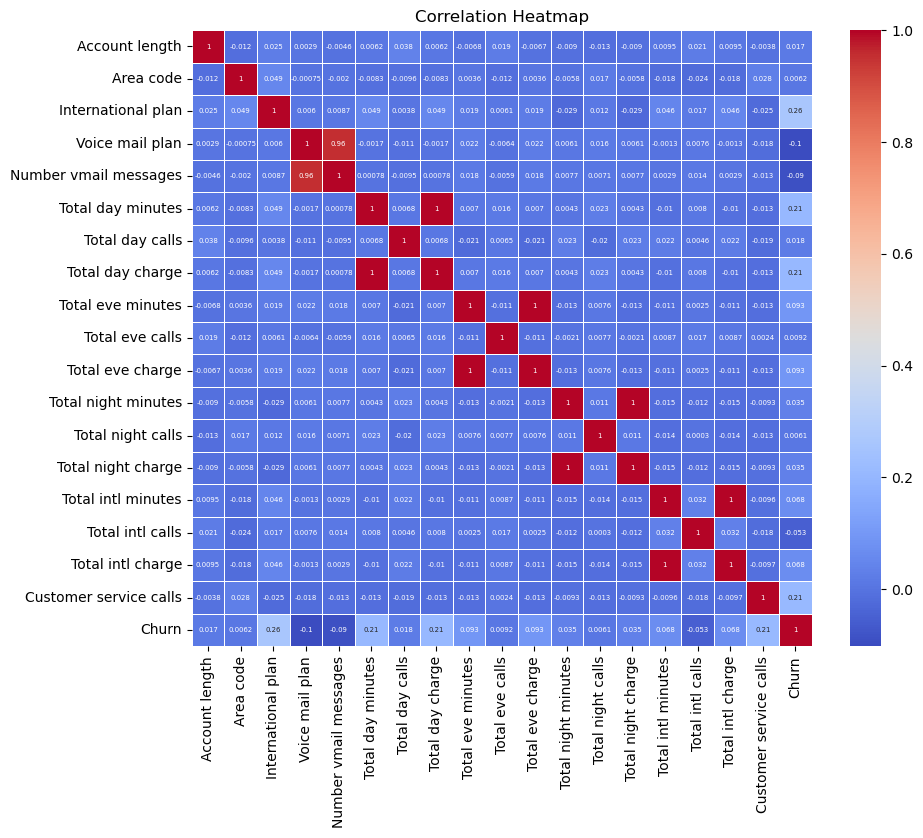

In [37]:
# Calculate the correlation matrix for the DataFrame 'data'
correlation_matrix = data.corr()

# The above code computes the correlation between different numeric columns in the dataset.

# Create a figure with a specified size (10x8 inches)
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
# 'annot=True' adds annotations (correlation values) to the heatmap,
# 'cmap="coolwarm"' sets the color map, 'linewidths=.5' adds grid lines,
# and 'annot_kws={"size": 5}' sets the font size for annotations.
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, annot_kws={"size": 5})

# Set the title for the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

Charges are based on Minutes

In [38]:
# Create a new column "Total_charge" by summing the charges for day, evening, and night
data["Total_charge"] = data["Total day charge"] + data["Total eve charge"] + data["Total night charge"]

# Group the data by the "State" column and calculate the sum of "Total_charge" for each state
data.groupby("State")["Total_charge"].sum().sort_values(ascending=False)

State
WV    5791.29
MN    4834.22
NY    4619.99
AL    4533.11
OH    4516.77
WY    4395.69
VA    4394.75
WI    4383.78
OR    4374.81
IN    4266.27
VT    4213.39
CT    4171.43
MI    4165.73
MD    4139.25
KS    4127.03
ID    4089.81
TX    4077.25
UT    4059.71
NJ    4046.05
NC    3914.29
MT    3779.84
MA    3772.96
WA    3743.07
NV    3737.55
CO    3729.84
MS    3659.12
ND    3627.05
RI    3613.55
FL    3604.96
ME    3564.22
SD    3512.30
MO    3490.89
NM    3483.65
NE    3460.07
DE    3449.98
AZ    3447.21
OK    3407.13
SC    3282.64
KY    3253.61
IL    3197.63
NH    3157.14
GA    3106.40
AR    3095.15
TN    3033.99
DC    2975.68
HI    2933.21
LA    2866.34
AK    2841.53
PA    2570.82
IA    2479.74
CA    1939.79
Name: Total_charge, dtype: float64

WV state has the most charged

In [39]:
# Group the data by the "State" column and calculate the sum of "Churn" for each state
data.groupby("State")["Churn"].sum().sort_values(ascending=False)

State
NJ    18
TX    18
MD    17
MI    16
MN    15
NY    15
MT    14
NV    14
MS    14
SC    14
WA    14
KS    13
ME    13
CT    12
OR    11
NC    11
MA    11
AR    11
UT    10
WV    10
OH    10
OK     9
NH     9
WY     9
CA     9
IN     9
CO     9
ID     9
DE     9
FL     8
AL     8
KY     8
VT     8
SD     8
PA     8
GA     8
WI     7
MO     7
RI     6
NM     6
ND     6
TN     5
DC     5
IL     5
VA     5
NE     5
LA     4
AZ     4
HI     3
IA     3
AK     3
Name: Churn, dtype: int64

NJ has more Churnes

# Data Visualization

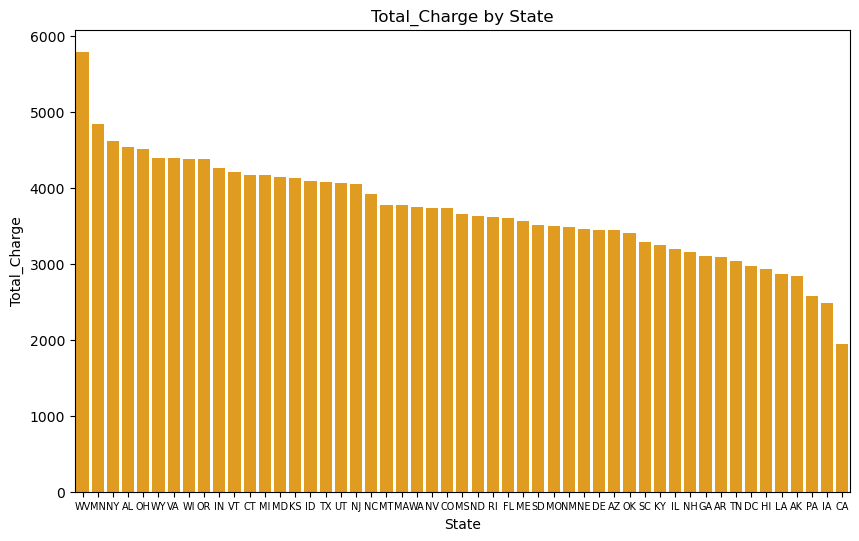

In [40]:
# Group the data by the "State" column and calculate the sum of "Total_charge" for each state
sum_bystate = data.groupby("State")["Total_charge"].sum().sort_values(ascending=False)

# Create a bar plot to visualize the total charges by state
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Total_charge", data=sum_bystate.reset_index(), color='orange')

# Set labels for the x and y axes
plt.xlabel("State")
plt.ylabel("Total_Charge")

# Customize the x-axis tick labels to make them more readable (fontsize=7)
plt.xticks(fontsize=7)

# Set the title for the bar plot
plt.title("Total_Charge by State")

# Display the bar plot
plt.show()


Text(0.5, 1.0, 'Total Churn by State')

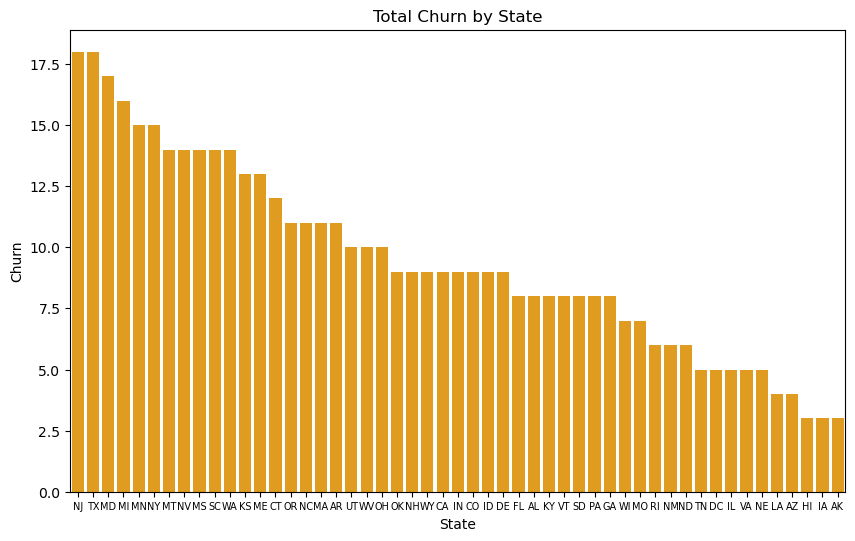

In [41]:
# Group the data by the "State" column and calculate the sum of "Churn" for each state
sum_bystate = data.groupby("State")["Churn"].sum().sort_values(ascending=False)

# Create a bar plot to visualize the total churn by state
plt.figure(figsize=(10, 6))
sns.barplot(x="State", y="Churn", data=sum_bystate.reset_index(), color='orange')

# Set labels for the x and y axes
plt.xlabel("State")
plt.ylabel("Churn")

# Customize the x-axis tick labels to make them more readable (fontsize=7)
plt.xticks(fontsize=7)

# Set the title for the bar plot
plt.title("Total Churn by State")

In [42]:
# Function to update and display the pie chart based on the selected State
def update_pie_chart(state):
    if state=="State":
        filtered_data = data
        
    else:
        # Filter the DataFrame based on the selected State
        filtered_data = data[data['State'] == state]
    # Count the unique values of 'Churn' for the filtered data
    churn_count = filtered_data['Churn'].value_counts().reset_index()

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(churn_count['Churn'], labels=churn_count['index'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Churn Distribution for {state}')   
    plt.show()
    
    
# Get the unique State values from the DataFrame
state_values = data['State'].unique()

# Create an interactive widget to choose the State
state_dropdown = widgets.Dropdown(
    options=['State'] + list(state_values),  # Add an empty option for "No selection"
    description='Select State:',
    disabled=False
)

# Use the interact function to update the pie chart based on the selected State
interact(update_pie_chart, state=state_dropdown)

interactive(children=(Dropdown(description='Select State:', options=('State', 'KS', 'OH', 'NJ', 'OK', 'AL', 'M…

<function __main__.update_pie_chart(state)>

In [43]:
# Define a function to update the bar plot based on the selected state
def update_bar_plot(state):
    if state == "State":
        # If the state is "State," display the entire dataset
        filtered_data = data
    else:
        # Otherwise, filter the DataFrame based on the selected state
        filtered_data = data[data['State'] == state]
    
    # Calculate the total charge by churn status and sort in descending order
    sum_by_churn = filtered_data.groupby("Churn")["Total_charge"].sum().sort_values(ascending=False).reset_index()
    
    # Create a bar plot to visualize total charges by churn status
    sns.barplot(x="Churn", y="Total_charge", data=sum_by_churn)
    plt.xlabel("Churn")
    plt.ylabel("Total_Charge")
    plt.title("Total_Charge by Churn")
    plt.show()

# Get the unique State values from the DataFrame
state_values = data['State'].unique()

# Create an interactive widget (dropdown) to choose the State
state_dropdown = widgets.Dropdown(
    options=['State'] + list(state_values),  # Add an empty option for "No selection"
    description='Select State:',
    disabled=False
)

# Use the interact function to update the bar plot based on the selected State
interact(update_bar_plot, state=state_dropdown)


interactive(children=(Dropdown(description='Select State:', options=('State', 'KS', 'OH', 'NJ', 'OK', 'AL', 'M…

<function __main__.update_bar_plot(state)>

In [44]:
# Function to update and display the pie chart based on the selected State
def update_pie_chart(state):
    if state=="State":
        filtered_data = data
        
    else:
        # Filter the DataFrame based on the selected State
        filtered_data = data[data['State'] == state]
    # Count the unique values of 'Churn' for the filtered data
    churn_count = filtered_data['International plan'].value_counts().reset_index()

    # Create a pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(churn_count['International plan'], labels=churn_count['index'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'International plan Distribution for {state}')   
    plt.show()
    
    
# Get the unique State values from the DataFrame
state_values = data['State'].unique()

# Create an interactive widget to choose the State
state_dropdown = widgets.Dropdown(
    options=['State'] + list(state_values),  # Add an empty option for "No selection"
    description='Select State:',
    disabled=False
)

# Use the interact function to update the pie chart based on the selected State
interact(update_pie_chart, state=state_dropdown)

interactive(children=(Dropdown(description='Select State:', options=('State', 'KS', 'OH', 'NJ', 'OK', 'AL', 'M…

<function __main__.update_pie_chart(state)>

In [45]:
# Define a function to update the bar plot based on the selected state
def update_bar_plot(state):
    if state == "State":
        # If the state is "State," display the entire dataset
        filtered_data = data
    else:
        # Otherwise, filter the DataFrame based on the selected state
        filtered_data = data[data['State'] == state]
    
    # Calculate the total international charges by international plan and sort in descending order
    sum_by_churn = filtered_data.groupby("International plan")["Total intl charge"].sum().sort_values(ascending=False).reset_index()
    
    # Create a bar plot to visualize total international charges by international plan
    sns.barplot(x="International plan", y="Total intl charge", data=sum_by_churn)
    plt.xlabel("International plan")
    plt.ylabel("Total intl charge")
    plt.title("Total intl charge by International plan")
    plt.show()

# Get the unique State values from the DataFrame
state_values = data['State'].unique()

# Create an interactive widget (dropdown) to choose the State
state_dropdown = widgets.Dropdown(
    options=['State'] + list(state_values),  # Add an empty option for "No selection"
    description='Select State:',
    disabled=False
)

# Use the interact function to link the widget to the update_bar_plot function
interact(update_bar_plot, state=state_dropdown)

interactive(children=(Dropdown(description='Select State:', options=('State', 'KS', 'OH', 'NJ', 'OK', 'AL', 'M…

<function __main__.update_bar_plot(state)>

# Dashboard

In [46]:
# Function to create and display the bar plot for international charges
def create_bar_plot_int(state):
    # Check if the selected state is "All States"
    if state == "All States":
        filtered_data = data
    else:
        filtered_data = data[data['State'] == state]
    
    # Calculate the total international charges by international plan and sort in descending order
    sum_by_churn = filtered_data.groupby("International plan")["Total intl charge"].sum().sort_values(ascending=False).reset_index()
    
    # Create a bar plot to visualize total international charges by international plan
    sns.barplot(x="International plan", y="Total intl charge", data=sum_by_churn)
    plt.xlabel("International plan")
    plt.ylabel("Total intl charge")
    plt.title(f"Total intl charge by International plan ({state})")
    plt.show()

# Function to create and display the pie chart for international plan distribution
def create_pie_chart_int(state):
    if state == "All States":
        filtered_data = data
    else:
        filtered_data = data[data['State'] == state]
    
    churn_count = filtered_data['International plan'].value_counts().reset_index()

    plt.pie(churn_count['International plan'], labels=churn_count['index'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'International plan Distribution ({state})')
    plt.show()

# Function to create and display the pie chart for churn distribution
def create_pie_chart_churn(state):
    if state == "All States":
        filtered_data = data
    else:
        filtered_data = data[data['State'] == state]
    
    churn_count = filtered_data['Churn'].value_counts().reset_index()

    plt.pie(churn_count['Churn'], labels=churn_count['index'], autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Churn Distribution for {state}')   
    plt.show()

# Function to create and display the bar plot for total charges by churn status
def create_bar_plot_churn(state):
    if state == "All States":
        filtered_data = data
    else:
        filtered_data = data[data['State'] == state]
   
    sum_by_churn = filtered_data.groupby("Churn")["Total_charge"].sum().sort_values(ascending=False).reset_index()
    
    sns.barplot(x="Churn", y="Total_charge", data=sum_by_churn)
    plt.xlabel("Churn")
    plt.ylabel("Total_Charge")
    plt.title("Total_Charge by Churn")
    plt.show()

# Function to create and display the bar plot for total charges by state
def create_bar_plot_sumCharge(state):
    if state == "All States":
        filtered_data = data
    else:
        filtered_data = data[data['State'] == state]
        
    sum_bystate = filtered_data.groupby("State")["Total_charge"].sum().sort_values(ascending=False)
    plt.figure(figsize=(6, 5))
    sns.barplot(x="State", y="Total_charge", data=sum_bystate.reset_index(), color='orange')
    plt.xlabel("State")
    plt.ylabel("Total_Charge")
    plt.xticks(fontsize=5)
    plt.title("Total_Charge by State")
    plt.show()

# Function to create and display the bar plot for total churn by state
def create_bar_plot_sumChurn(state):
    if state == "All States":
        filtered_data = data
    else:
        filtered_data = data[data['State'] == state]
        
    sum_bystate = filtered_data.groupby("State")["Churn"].sum().sort_values(ascending=False)
    plt.figure(figsize=(6, 5))
    sns.barplot(x="State", y="Churn", data=sum_bystate.reset_index(), color='orange')
    plt.xlabel("State")
    plt.ylabel("Total_Churn")
    plt.xticks(fontsize=5)
    plt.title("Total_Churn by State")
    plt.show()    

# Get the unique State values from the DataFrame
state_values = ['All States'] + list(data['State'].unique())

# Create a dropdown widget to choose the State
state_dropdown = widgets.Dropdown(
    options=state_values,
    description='Select State:',
    disabled=False
)

# Create horizontal boxes for each line of widgets
line1 = widgets.HBox([
    widgets.interactive(create_bar_plot_int, state=state_dropdown),
    widgets.interactive(create_bar_plot_churn, state=state_dropdown)
])

line2 = widgets.HBox([
    widgets.interactive(create_pie_chart_int, state=state_dropdown),
    widgets.interactive(create_pie_chart_churn, state=state_dropdown)
])

line3 = widgets.HBox([
    widgets.interactive(create_bar_plot_sumCharge, state=state_dropdown),
    widgets.interactive(create_bar_plot_sumChurn, state=state_dropdown)
])

# Create a vertical box to arrange the lines of widgets
dashboard_layout = widgets.VBox([line1, line2, line3])

# Display the dashboard
dashboard_layout